# <center>Tarea 3 - Redes Complejas</center>
 <div style="text-align: right"> Jean-Pierre Villacura - Felipe Cisternas, 25 de Junio de 2023</div>

### Introducción

El siguiente informe corresponde al desarrollo de los enunciados de la Tarea 3 en la asignatura Redes Complejas.
Los contenidos abordados están relacionados con __****__ , entre otros.

---
# Pregunta 1: 

En el archivo ciudades.txt encontrará una lista de números que reflejan la población
de un conjunto de localidades (ciudades, pueblos, algunas cosas chicas que no dan ni para
caserío). Suponiendo que la distribución de estos valores decae como una ley de potencia,
determine el exponente lo mejor que pueda. Especifique qué uso para estimarlo, y qué xmin
consideró (es decir, desde donde corre su ley de potencia).

Considerando que el archivo __ciudades.txt__ contiene en cada línea la cantidad de población que tiene una determinada localidad. Se cuentan cerca de 19444 localidades. 
Esta información se organiza en una lista de enteros ordenados de mayor a menor, de manera que las localidades con mayor población estan primero. 

Se realiza un código para leer el archivo anterior, y otro para determinar el exponente suponiendo una distribución de ley de potencia, utilizando la función __curve_fit(f,x,y)__ de la librería __plt__.

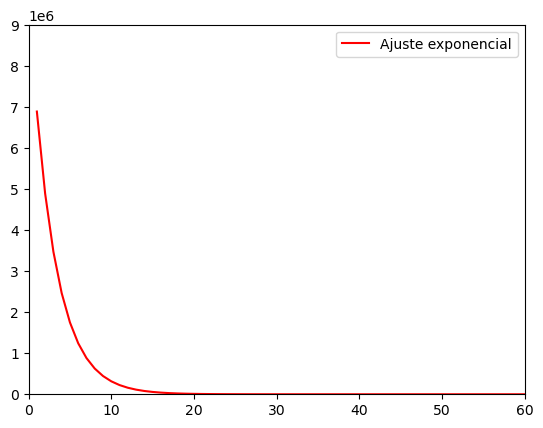

Exponente: -0.3424042206858533


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
def leer_archivo_txt(nombre_archivo):
    resultado = []
    indice=1
    with open(nombre_archivo, 'r') as archivo:
        numeros = archivo.read().splitlines()
        frecuencia = {}
        for numero in numeros:
            if numero in frecuencia:
                frecuencia[numero] += 1
            else:
                frecuencia[numero] = 1
        return frecuencia, numeros
#def plotear_lista(numeros, muestreo=1000):
#    indices = np.linspace(0, len(numeros) - 1, muestreo, dtype=int)
#    numeros_muestreados = [numeros[i] for i in indices]  
#    plt.plot(indices, numeros_muestreados)
#    plt.show()
def funcion_exponencial(x, a, b):
    return a * np.exp(-np.abs(b * x))

def plot_exp(x, y):
    x = np.array(x)  # Convertir x a un arreglo numpy
    y = np.array(y)  # Convertir y a un arreglo numpy
    
    params, _ = curve_fit(funcion_exponencial, x, y)
    plt.plot(x, funcion_exponencial(x, *params), color='red', label='Ajuste exponencial')
    plt.ylim(0,9000000)
    plt.xlim(0, 60)
    plt.legend()
    plt.show()
    exponente = params[1]
    print(f'Exponente: {exponente}')
    
dicc_poblacion, numeros=leer_archivo_txt('ciudades.txt')
numeros_ordenados = sorted(numeros, reverse=True, key=lambda x: float(x))

x=list(range(1, len(numeros_ordenados) + 1))

y=numeros_ordenados

plot_exp(x,y)


Podemos notar que se obtiene un exponente de __-0.34__ . 

Si tabulamos los datos en Excel, podemos notar que a medida que ajustamos el rango de las localidades(con un orden decreciente), el valor que arroja la distribución exponencial de Excel se acerca al valor obtenido anteriormente. 

<img src="Figuras/Ej1/Excel-19448.PNG" alt= “” width="400" height="400">

<img src="Figuras/Ej1/Excel-994.PNG" alt= “” width="400" height="400">

<img src="Figuras/Ej1/Excel-171.PNG" alt= “” width="400" height="400">

<img src="Figuras/Ej1/Excel-97.PNG" alt= “” width="400" height="400">

<img src="Figuras/Ej1/Excel-8.PNG" alt= “” width="400" height="400">

Obteniendo los siguientes resultados en las planillas de Excel. 

| n° Primeras Localidades | Exponente |
|:----------:|:----------:|
| 19448   |-0.0002|
| 993    |-0.002|
| 173    |0.013|
| 97    |0.021|
| 9    |0.221|

Considerando que el código(con la función __curve_fit()__ ) arroja un exponente de -0.34.

Se deduce que el mejor exponente es tomando las primeras 9 localidades(con orden decreciente), es decir __xmin__ correspondiente a las primeras 9 localidades, ya que podemos ver que la curva de distribución exponiencial arrojada por Excel coincide en la mayoría de puntos, exceptuando el primero, con la curva de los datos. 

Se advierte que es posible mejorar el exponente obtenido si tomamos las primeras 9 localidades, mencionadas anteriormente, y no consideramos la primera, que es la que se aleja significativamente de la distribución.

---
# Pregunta 2: 

pescado.gdf Es una __red dirigida__ y __con pesos__, que representa las exportaciones
de pescado de un país a otro en 1998, medidas en millones de US$. O sea: un arco de A a B
con peso w indica que el país A le vendió al país B w millones de dólares de pescado.

## Item A
Obtenga la matriz de adyacencia de la red y úsela para evaluar la reciprocidad corregida
de la red. Comente su resultado: es recíproca, antirrecíproca o ninguna de las anteriores?


Antes de obtener esta matriz, vamos a graficar utilizando Gephi el grafo de esta red: 
<img src="Figuras/Ej2/a_inicio.png" alt= “” width="900" height="900">

Podemos notar que los arcos con mayor peso se encuentran en el extremo superior del grafo. 

Vamos a aplicar el filtro de 'Mutual Edges' que contiene Gephi para tener una idea de la reciprocidad de la red. Se verificará con código luego.

<img src="Figuras/Ej2/a_mutualedge.png" alt= “” width="900" height="900">

Notamos que el grafo contiene:

- 151 Nodos
- 2751 Arcos(De los cuales, el 47%, 1282 son arcos mutuos).

Vamos a realizar ahora el código para determinar la matriz de adyacencia y usarla para evaluar la reciprocidad corregida de la red.

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
def leer_archivo(archivo):
    with open(archivo, 'r') as file:
        lineas = file.readlines()
    data_start = False; nodos = []; arcos_sin_peso = [];arcos_con_peso=[]
    for linea in lineas:
        linea = linea.strip()
        if linea.startswith('nodedef>'):
            data_start = True
            continue
        elif linea.startswith('edgedef>') or linea.startswith('edges>'):
            data_start = False
            continue
        if data_start:
            parts = linea.split(',')
            node_id = int(parts[0])
            node_label = parts[1]
            nodos.append((node_id, node_label))
        else:
            parts = linea.split(',')
            source = int(parts[0])
            target = int(parts[1])
            weight=parts[2]
            arcos_sin_peso.append((source, target))
            arcos_con_peso.append((source,target,weight))
    return nodos, arcos_sin_peso,arcos_con_peso
def crear_matriz_adyacencia(nodos, arcos):
    matriz_adyacencia = np.zeros((len(nodos), len(nodos)))
    for arco in arcos:
        inicio, fin = arco
        matriz_adyacencia[inicio - 1, fin - 1] = 1
    return matriz_adyacencia
def reciprocidad(MA):
    num_nodes = MA.shape[0]
    arcos_mutuos = 0
    arcos_dirigidos = 0
    for i in range(num_nodes):
        for j in range(num_nodes):
            if MA[i, j] == 1 and MA[j, i] == 1:
                arcos_mutuos += 1
            if MA[i, j] == 1:
                arcos_dirigidos += 1
    coef= arcos_mutuos / arcos_dirigidos
    return coef
def entregar_distribuciones_suma_pesos(nodos,arcos_weight):
    peso_nodos_in={}
    peso_nodos_out={}
    d= 0# decimales redondeo
    contador_in=0
    contador_out=0
    for nodo in nodos:
        peso_nodos_in[nodo[0]]=0
        peso_nodos_out[nodo[0]]=0
    for elemento in arcos_weight:
        nodo_inicio=elemento[0]
        nodo_fin=elemento[1]
        peso=float(elemento[2])
        peso_nodos_in[nodo_inicio]+=peso
        peso_nodos_out[nodo_fin]+=peso
    for elemento in peso_nodos_in:
        valor=peso_nodos_in[elemento]
        peso_nodos_in[elemento]=np.round(valor,d)
    for elemento in peso_nodos_out:
        valor=peso_nodos_out[elemento]
        peso_nodos_out[elemento]=np.round(valor,d)
        
    return peso_nodos_in,peso_nodos_out

def plot(x,y,xlimdown,xlimup,ylimdown,ylimup,etiqueta,titulo):
    x = np.array(x) 
    y = np.array(y)  
    plt.plot(x, y, color='red', label=etiqueta)
    plt.ylim(ylimdown,ylimup)
    plt.xlim(xlimdown,xlimup)
    plt.title(titulo)
    plt.legend()
    plt.show()
    
def graficar_dispersion(x,y1,y2,arg,xlimdown,xlimup,ylimdown,ylimup,etiqueta1,etiqueta2,titulo):
    x=np.array(x)
    y1=np.array(y1)
    y2=np.array(y2)
    plt.plot(x, y1,arg,color='red', label=etiqueta1)
    plt.plot(x, y2,arg,color='blue', label=etiqueta2)
    plt.ylim(ylimdown,ylimup)
    plt.xlim(xlimdown,xlimup)    
    plt.xlabel('Nodos')
    plt.ylabel('Suma de Pesos')
    plt.title(titulo)
    plt.legend()
    plt.show()
    
    
    
    
archivo='pescado.gdf'
nodos, arcos,arcos_weight = leer_archivo(archivo)
red=nx.Graph()
red.add_nodes_from(nodos)
#print(nodos[1][0])
red.add_edges_from(arcos)
red_dirigida=red
MA=crear_matriz_adyacencia(nodos, arcos)
reciprocidad= reciprocidad(MA)
print('Matriz de Adyacencia MA: ')
print(MA)
print('Coeficiente reciprocidad: '+str(float(reciprocidad)))





Matriz de Adyacencia MA: 
[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Coeficiente reciprocidad: 0.467201166180758


Podemos notar que el coeficiente de reciprocidad obtenido en la matriz de adyacencia es __0.46__ . Valor que coincide con el obtenido por Gephi en un inicio.

Suponiendo que una red es reciproca cuando el coeficiente de reciprocidad es 1, y es antireciproca cuando el coeficiente es cero. 

Entonces la red es "mitad-reciproca", ya que su coeficiente de reciprocidad(0.46) se encuentra al medio entre ambas definiciones.

## Item B 
Grafique las distribuciones P(sin) y P(sout), donde Sin (resp. sout) de un nodo se define
como la suma de los pesos de los arcos que entran a él (resp., salen de él), Corresponden
a algún tipo de distribución conocida? De ser así, estime sus parámetros.

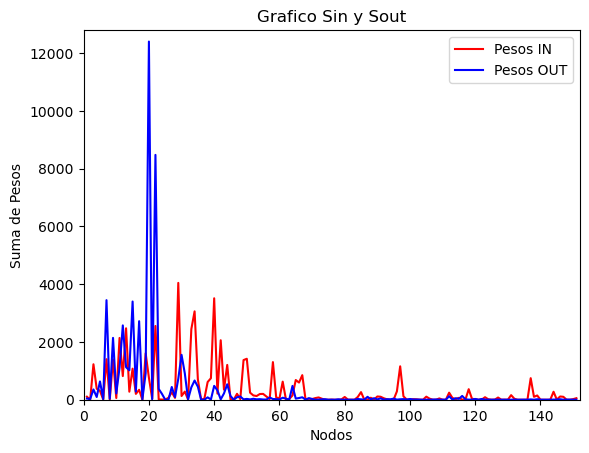

In [3]:
nodos_pesos_in, nodos_pesos_out=entregar_distribuciones_suma_pesos(nodos,arcos_weight)
lista_nodos=[]; lista_nodos_pesos_in=[]; lista_nodos_pesos_out=[]
for elemento in nodos:
    lista_nodos.append(elemento[0])
for elemento in nodos_pesos_in:
    lista_nodos_pesos_in.append(nodos_pesos_in[elemento])
for elemento in nodos_pesos_out:
    lista_nodos_pesos_out.append(nodos_pesos_out[elemento])
arg='' # Curva continua arg: '', Dispersion arg:'o', 
graficar_dispersion(lista_nodos,lista_nodos_pesos_in,lista_nodos_pesos_out,arg,0,152,0,12800,'Pesos IN','Pesos OUT','Grafico Sin y Sout')


No se observa algún tipo de descripción conocida.

Procedemos a ordenar los datos en orden decreciente, quizás encontremos una distribución. 

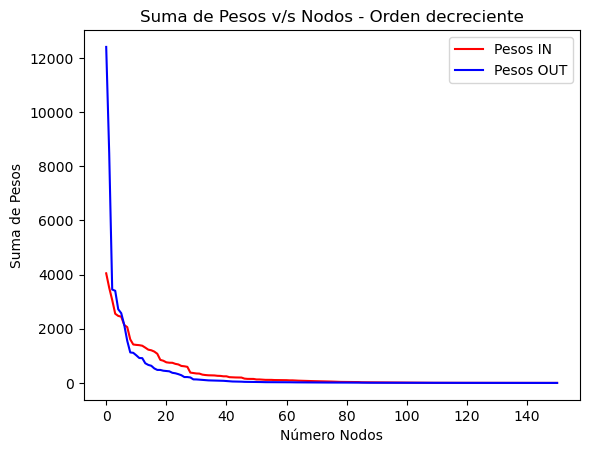

In [4]:

def obtener_coordenadas(puntos_x, puntos_y):
    coordenadas = []
    # Verificar que las listas tengan la misma longitud
    if len(puntos_x) != len(puntos_y):
        raise ValueError("Las listas deben tener la misma longitud.")
    # Recorrer las listas y combinar los puntos en coordenadas
    for i in range(len(puntos_x)):
        coordenadas.append((puntos_x[i], puntos_y[i]))
    return coordenadas

coord_in=obtener_coordenadas(lista_nodos,lista_nodos_pesos_in)
coord_out=obtener_coordenadas(lista_nodos,lista_nodos_pesos_out)

puntos_ordenados = sorted(coord_in, key=lambda punto: punto[1], reverse=True)
puntos_ordenados2 = sorted(coord_out, key=lambda punto: punto[1], reverse=True)

# Imprimir los puntos ordenados
def plot_grafico(y1,y2,label1,label2):
    x1=[];x2=[]
    for i in range(0,len(y1)):
        x1.append(i)
    for i in range(0,len(y2)):
        x2.append(i)        
        
    plt.plot(x1,y1,color='red',label=label1)
    plt.plot(y2,color='blue',label=label2)
    plt.xlabel('Número Nodos')
    plt.ylabel('Suma de Pesos')
    plt.title('Suma de Pesos v/s Nodos - Orden decreciente')
    plt.legend()
    plt.show()

lista_nodos_pesos_in.sort(reverse=True)
lista_nodos_pesos_out.sort(reverse=True)
plot_grafico(lista_nodos_pesos_in,lista_nodos_pesos_out,'Pesos IN','Pesos OUT')


Al ordenar la suma de pesos por nodo en forma decreciente, considerando que no requieren ser ordenados los nodos en el eje x,  se obtienen en ambas curvas de suma de Pesos __IN__ y __OUT__ una función exponencial. 

Vamos a determinar el parámetro del exponente y el coeficiente suponiendo distribución exponiencial.

Debido a que en el eje x tenemos nodos y no es relevante su orden, entonces iremos asumiendo un determinado espacio entre cada nodo(que se encuentran ordenados descendientemente según peso ), con el objetivo de encontrar los mejores parámetros de una distribución exponiencial.



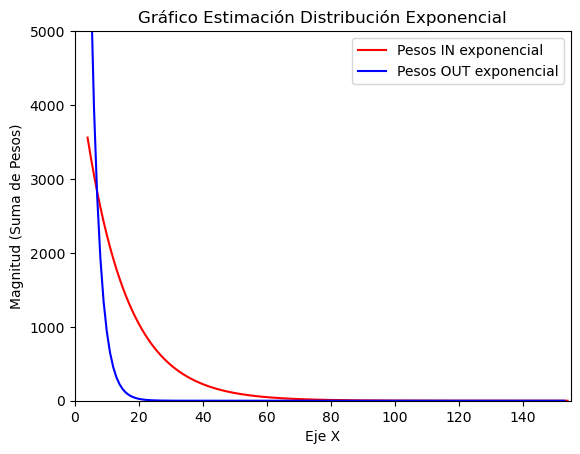

Suposición Distribuciónn Exponiencial Curva Suma de Pesos IN: 
    Coeficiente: 4839.56
    Exponente: -0.08
Suposición Distribuciónn Exponiencial Curva Suma de Pesos OUT: 
    Coeficiente: 34472.01
    Exponente: -0.36


In [5]:
def plot_exp_ej2(x1, y1, x2, y2, label1, label2,xlim_0,xlim_1,ylim_0,ylim_1):
    x1 = np.array(x1) 
    y1 = np.array(y1) 
    x2 = np.array(x2) 
    y2 = np.array(y2)    
    
    params1, _ = curve_fit(funcion_exponencial, x1, y1)
    params2, _ = curve_fit(funcion_exponencial, x2, y2)
    plt.plot(x1, funcion_exponencial(x1, *params1), color='red', label=label1)
    plt.plot(x2, funcion_exponencial(x2, *params2), color='blue', label=label2)    
    plt.ylim(ylim_0,ylim_1)
    plt.xlim(xlim_0, xlim_1)
    plt.legend()
    plt.xlabel('Eje X')
    plt.ylabel('Magnitud (Suma de Pesos)')
    plt.title('Gráfico Estimación Distribución Exponencial')
    plt.show()
    exponente1 = params1[1]
    exponente2 = params2[1]
    print('Suposición Distribuciónn Exponiencial Curva Suma de Pesos IN: ')
    print('    Coeficiente: '+str(np.round(params1[0],2)))
    print('    Exponente: '+str(np.round(params1[1],2)))
    print('Suposición Distribuciónn Exponiencial Curva Suma de Pesos OUT: ')
    print('    Coeficiente: '+str(np.round(params2[0],2)))
    print('    Exponente: '+str(np.round(params2[1],2)))
    

x1=[];x2=[]
for i in range(0,len(lista_nodos_pesos_in)):
    x1.append(i+4)
for i in range(0,len(lista_nodos_pesos_out)):
    x2.append(i+3)    
    
plot_exp_ej2(x1, lista_nodos_pesos_in, x2, lista_nodos_pesos_out, 'Pesos IN exponencial', 'Pesos OUT exponencial',0,155,0,5000)


Por lo tanto al ordenar en forma decreciente los valores de las sumas de pesos de los nodos, considerando que no es relevante un orden en el eje X donde están los nodos, __se observa una distribución exponencial en ambas curvas (Sin y Sout)__ .

Se procede a determinar los parámetros de estas curvas utilizando la función __curve_fit()__ asumiendo una distribución exponiencial. 

Se obtienen los siguientes parámetros asumiendo una distribución exponiencial: 

- Sin (Suma de Pesos IN) -> Distribución Exponencial
  - Coeficiente: 4839.56
  - Exponente: -0.08
- Sout (Suma de Pesos OUT) -> Distribución Exponencial
  - Coeficieente: 34472
  - Exponente: -0.36

## Item C 
Realice un gráfico de dispersión para Sin y Sout con el conjunto de nodos. ¿Se ve un tipo de relación entre ambas variables ?

PARTE C


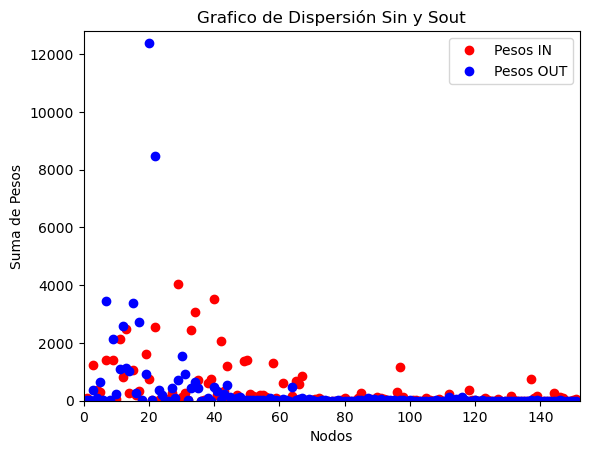

In [6]:
print('PARTE C')
nodos_pesos_in, nodos_pesos_out=entregar_distribuciones_suma_pesos(nodos,arcos_weight)
lista_nodos=[]; lista_nodos_pesos_in=[]; lista_nodos_pesos_out=[]
for elemento in nodos:
    lista_nodos.append(elemento[0])
for elemento in nodos_pesos_in:
    lista_nodos_pesos_in.append(nodos_pesos_in[elemento])
for elemento in nodos_pesos_out:
    lista_nodos_pesos_out.append(nodos_pesos_out[elemento])
graficar_dispersion(lista_nodos,lista_nodos_pesos_in,lista_nodos_pesos_out,'o',0,152,0,12800,'Pesos IN','Pesos OUT','Grafico de Dispersión Sin y Sout')


No se ve algún tipo de relación entre ambas variables __Sin__ y __Sout__ respecto a la suma de pesos por nodo.

Procederemos a realizar un orden decreciente en la suma de pesos:

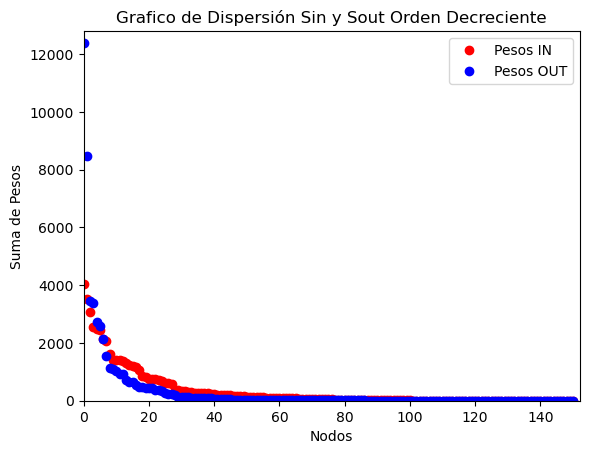

In [7]:
lista_nodos_pesos_in.sort(reverse=True)
lista_nodos_pesos_out.sort(reverse=True)
x1=[];x2=[]
for i in range(0,len(lista_nodos_pesos_in)):
    x1.append(i)
for i in range(0,len(lista_nodos_pesos_out)):
    x2.append(i)    

graficar_dispersion(x1,lista_nodos_pesos_in,lista_nodos_pesos_out,'o',0,152,0,12800,'Pesos IN','Pesos OUT','Grafico de Dispersión Sin y Sout Orden Decreciente')


Al realizar un orden decreciente en la suma de pesos y obtener el gráfico de dispersión:

__Notamos que las curvas de sumas de peso de Sin y Sout son muy similares (casi idénticas)__ . Por lo que armas curvas siguen una tendencia similar y tienen valores muy cercanos entre sí en la mayoría de puntos.


Ahora convierta su red en una red no dirigida. Reemplazando por una arista cada par de nodos que están conectados por uno o dos arcos, asociando al peso del arco la suma de los pesos anteriores.



## Item E 
Evalue P(k), P(s) y P(w) para la nueva versión de la red. Nuevamente, si se parece a alguna distribución conocida, estimele los parámetros.

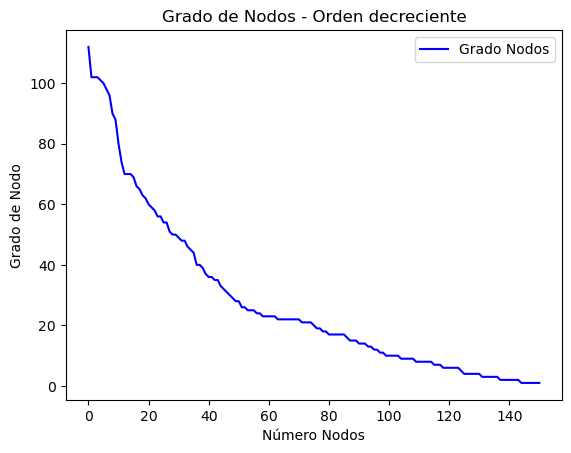

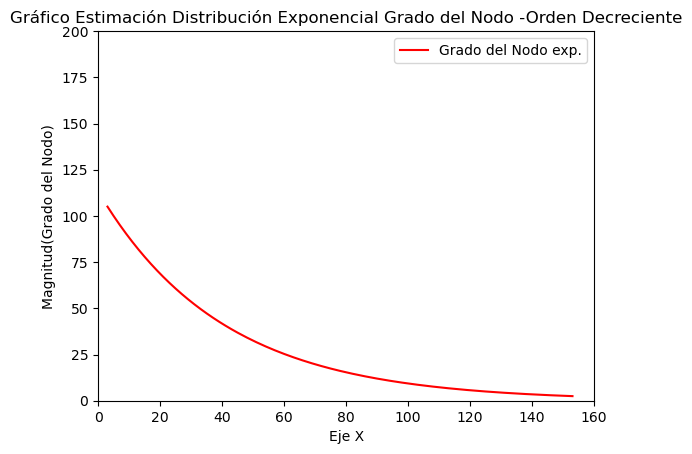

Suposición Distribución Exponencial - Grado del Nodo:
    Coeficiente: 113.2
    Exponente: -0.02


In [8]:
arcos_con_pesos_dirigido=arcos_weight
#print(arcos_con_pesos_dirigido)

def convertir_a_lista_no_dirigida(lista_dirigida):
    lista_no_dirigida = []
    for elemento in lista_dirigida:
        nodo1, nodo2, peso = elemento
        # Buscar una conexión existente entre nodo1 y nodo2
        conexion_existente = None
        for conexion in lista_no_dirigida:
            if (conexion[0] == nodo1 and conexion[1] == nodo2) or (conexion[0] == nodo2 and conexion[1] == nodo1):
                conexion_existente = conexion
                break
        if conexion_existente:
            # Sumar el peso a la conexión existente
            nuevo_peso = float(conexion_existente[2]) + float(peso)
            nueva_conexion = (conexion_existente[0], conexion_existente[1], nuevo_peso)
            lista_no_dirigida.remove(conexion_existente)
            lista_no_dirigida.append(nueva_conexion)
        else:
            # Añadir una nueva conexión entre nodo1 y nodo2
            lista_no_dirigida.append((nodo1, nodo2, peso))
    return lista_no_dirigida
def crear_red_no_dirigida(lista_nodos_peso):
    lista_nodos=[]
    lista_arcos=[]
    #print(lista_nodos_peso)
    for elemento in lista_nodos_peso:
        lista_arcos.append((elemento[0],elemento[1]))
        if elemento[0] not in lista_nodos:
            lista_nodos.append(elemento[0])
        if elemento[1] not in lista_nodos:
            lista_nodos.append(elemento[1])

    red=nx.Graph()
    red.add_nodes_from(lista_nodos)
    #print(nodos[1][0])
    
    #red.add_edges_from(lista_arcos)
    red.add_edges_from(transformar_a_formato_para_add_edges_from(lista_nodos_peso))
    return red
def transformar_a_formato_para_add_edges_from(lista_nodos_peso):
    lista_out=[]
    for elemento in lista_nodos_peso:
        peso={}
        nodo_in=elemento[0]
        nodo_out=elemento[1]
        peso['weight']=float(elemento[2])
        lista_out.append((nodo_in,nodo_out,peso))
    return lista_out
def calcular_pesos_de_red(red):
    pesos_arcos_nodos = {}
    for nodo in red.nodes:
        peso_arco = sum([float(red[nodo][vecino]['weight']) for vecino in red.neighbors(nodo)])
        pesos_arcos_nodos[nodo] = peso_arco
    return pesos_arcos_nodos



lista_no_dirigida=convertir_a_lista_no_dirigida(arcos_con_pesos_dirigido)
red=crear_red_no_dirigida(lista_no_dirigida)
red_no_dirigida_con_pesos=red
lista_grado_nodos=red.degree()
eje_x_grado_nodos=[elemento[0] for elemento in lista_grado_nodos]
eje_y_grado_nodos=[elemento[1] for elemento in lista_grado_nodos]
eje_y_grado_nodos.sort(reverse=True)

plt.plot(eje_y_grado_nodos,color='blue',label='Grado Nodos')
plt.xlabel('Número Nodos')
plt.ylabel('Grado de Nodo')
plt.title('Grado de Nodos - Orden decreciente')
plt.legend()
plt.show()

#print(lista_grado_nodos) # [(1, 39), (2, 23) ]
x_grado=[]
for i in range(0,len(eje_x_grado_nodos)):
    x_grado.append(i+3)

x_grado_nodo = np.array(x_grado) 
y_grado_nodo = np.array(eje_y_grado_nodos)  
params1, _ = curve_fit(funcion_exponencial, x_grado_nodo, y_grado_nodo)
plt.plot(x_grado_nodo, funcion_exponencial(x_grado_nodo, *params1), color='red', label='Grado del Nodo exp.')
plt.ylim(0,200)
plt.xlim(0, 160)
plt.legend()
plt.xlabel('Eje X')
plt.ylabel('Magnitud(Grado del Nodo)')
plt.title('Gráfico Estimación Distribución Exponencial Grado del Nodo -Orden Decreciente')
plt.show()
print('Suposición Distribución Exponencial - Grado del Nodo:')
print('    Coeficiente: '+str(np.round(params1[0],2)))
print('    Exponente: '+str(np.round(params1[1],2)))


Podemos notar que al graficar la distribución del Grado del nodo, ordenado decrecientemente, se obtiene una curva con fluctuaciones que es parecida a la de una distribución exponencial. Se determinan los parámetros de Coeficiente y exponente asumiendo una distribución exponencial haciendo uso de la función __curvefit()__ .

Realizaremos el mismo ejercicio anterior, esta vez para la suma de los pesos que tiene cada nodo en esta red transformada a no dirigida.

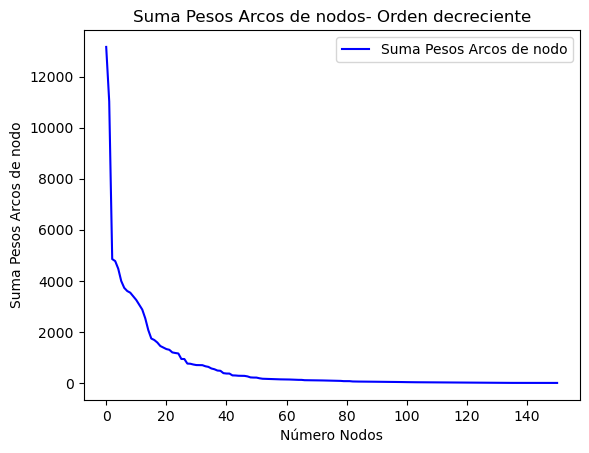

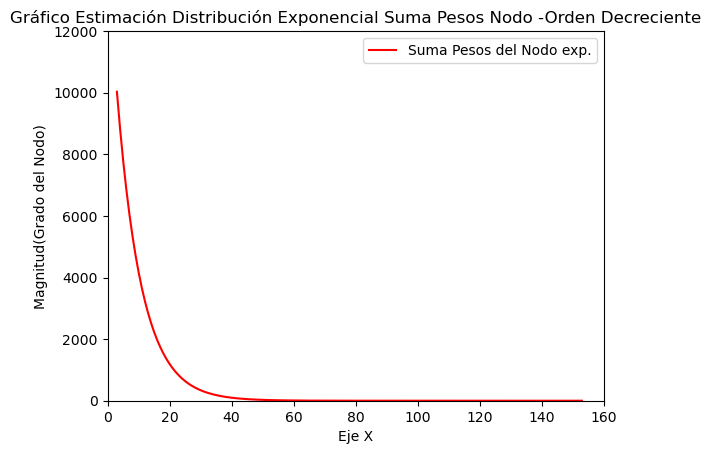

Suposición Distribución Exponencial - Suma Pesos Nodo:
    Coeficiente: 14610.16
    Exponente: -0.13


In [9]:
lista_peso_asociados_a_nodos=calcular_pesos_de_red(red)
#print(lista_peso_asociados_a_nodos)

pesos_asociados_a_nodos=[]
for elemento in lista_peso_asociados_a_nodos:
    peso=float(np.round(lista_peso_asociados_a_nodos[elemento],2))
    pesos_asociados_a_nodos.append(peso)
pesos_asociados_a_nodos.sort(reverse=True)

plt.plot(pesos_asociados_a_nodos,color='blue',label='Suma Pesos Arcos de nodo')
plt.xlabel('Número Nodos')
plt.ylabel('Suma Pesos Arcos de nodo')
plt.title('Suma Pesos Arcos de nodos- Orden decreciente')
plt.legend()
plt.show()

x_grado=[]
for i in range(0,len(pesos_asociados_a_nodos)):
    x_grado.append(i+3)

x_grado_nodo = np.array(x_grado) 
y_grado_nodo = np.array(pesos_asociados_a_nodos)  
params1, _ = curve_fit(funcion_exponencial, x_grado_nodo, y_grado_nodo)
plt.plot(x_grado_nodo, funcion_exponencial(x_grado_nodo, *params1), color='red', label='Suma Pesos del Nodo exp.')
plt.ylim(0,12000)
plt.xlim(0, 160)
plt.legend()
plt.xlabel('Eje X')
plt.ylabel('Magnitud(Grado del Nodo)')
plt.title('Gráfico Estimación Distribución Exponencial Suma Pesos Nodo -Orden Decreciente')
plt.show()
print('Suposición Distribución Exponencial - Suma Pesos Nodo:')
print('    Coeficiente: '+str(np.round(params1[0],2)))
print('    Exponente: '+str(np.round(params1[1],2)))


Para el caso de la distribución de suma de los pesos de los arcos asociados a nodos notamos una curva exponencial en el ploteo, con fluctuaciones pequeñas. Se parece a la distribución exponencial por lo que se estima sus parámetros utilizando la función curve_fit().

Se determina entonces para ambas distribuciones(De grado y de peso) que se parecen a una distribución exponencial y se estiman sus parámetros(Coeficiente y Exponente).
- Grado de Nodos: 
  - Distribución Exponencial.
    - Coeficiente: 113.2
    - Exponente: -0.02
- Peso de Arcos asociados a nodos:
  - Distribución Exponencial
    - Coeficiente: 11610
    - Exponente: -0.13

## Item F 
Plotee la dispersión de (grado,fuerza) para los nodos. ¿Es lineal la relación ? Comente

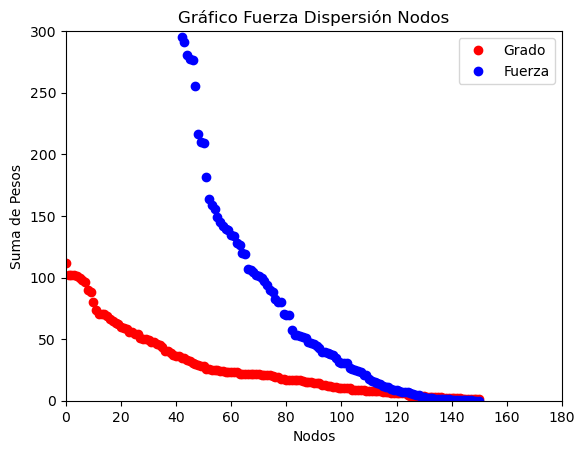

In [10]:
x_plot=[]
for i in range(0,len(pesos_asociados_a_nodos)):
    x_plot.append(i)
graficar_dispersion(x_plot,eje_y_grado_nodos,pesos_asociados_a_nodos,'o',0,180,0,300,'Grado','Fuerza','Gráfico Fuerza Dispersión Nodos')

Se observa que ambas curvas tienen un curva parecida a la de una exponencial. 

La relación entre ambas es que ambas decrecen con un comportamiento parecido. Sin embargo no se puede afirmar que sea lineal la relación porque no se nota una relación de proporcionalidad directa entre las variables.



## Item G
 Evalue el coeficiente de clustering de la red, con y sin pesos. Comente sus resultados.

__Networkx__ presenta 2 alternativas para determinar el coeficiente de clustering y transitividad de la red: __transitivity()__ y __average_clustering()__ . 

Se diferencian en que la primera no considera los pesos en la red, ya que calcula la fracción de todos los posibles triangulos en la red, por otro lado la segunda si puede considerar los pesos en la red añadiendo el argumento 'weight'.

El coeficiente de Clustering enfatiza en los grados de nodo bajo, mientras la transitividad en los nodos de grado alto. 

In [11]:
print('Transitividad Red Dirigida      : '+str(np.round(nx.transitivity(red_dirigida),2)))
print('Average Clustering Red Dirigida : '+str(np.round(nx.average_clustering(red_dirigida),2)))

transitividad_con_peso=nx.transitivity(red_no_dirigida_con_pesos)
print('Transitividad Red no dirigida, sin pesos     : '+str(np.round(transitividad_con_peso,2)))
transitividad_sin_peso=nx.average_clustering(red_no_dirigida_con_pesos)
print('Average Clustering Red no dirigida, sin pesos: '+str(np.round(transitividad_sin_peso,2)))
clustering_red_no_dirigida_con_peso=nx.average_clustering(red_no_dirigida_con_pesos,weight='weight')
print('Average Clustering red no dirigida, con pesos: '+str(np.round(clustering_red_no_dirigida_con_peso,5)))

Transitividad Red Dirigida      : 0.48
Average Clustering Red Dirigida : 0.37
Transitividad Red no dirigida, sin pesos     : 0.48
Average Clustering Red no dirigida, sin pesos: 0.75
Average Clustering red no dirigida, con pesos: 0.00303


Utilizando los comandos anteriormente mencionados se obtienen el average Custering y transitividad de la red para el caso sin peso y con peso.

Llama la atención que el __Average Clustering__ de la red no dirigida, sin pesos sea __0.75__ , que se puede considerar como un alto nivel de agrupamiento en la red. Sin embargo al considerar los pesos, el valor decrece a __0.00303__ , un resultado bastante pequeño. Con este último resultado se puede pensar que la contribución de los triangulos cerrados en la red es baja, es decir que gran parte de los triangulos cerrados tienen un peso pequeño en la red no dirigida. 

---
# Pregunta 3: 

Considere el siguiente modelo de dinámica social. Cada nodo de una red será blanco o negro (asignado inicialmente con probabilidades iguales, e inmutable de ahí en adelante). En cada iteración se escogerá un nodo al azar, y éste evaluará su nivel de satisfacción, definido como la fracción de vecinos que son de su mismo color. Si ese valor está por debajo de un cierto umbral u, entonces el nodo se desconectará de alguno de sus vecinos que eran del color contrario, y lo reemplazará por un nuevo nodo de su mismo color. Para escoger ese amigo nuevo, hará un paseo al azar (pasando de un vecino a otro) hasta encontrar alguien de su color que aún no sea amigo suyo.

Nos interesa ver cómo esta dinámica cambia la red, acaso eso depende del punto de partida, y también la dependencia respecto del parámetro u. Para esto, considere una red Erdös-Renyi y una Barabási-Albert, ambas de 1000 nodos y grado promedio 4. Para u pruebe los valores 0.25, 0.5, y 0.75 y 1 (aunque si le parece interesante puede probar otros). Itere cada simulación durante 10.000 pasos.

Lo que quiero que estudien es cómo difiere la red inicial de la red final; sugiero hacerlo para una de las redes y un valor de u, y luego ver si sus conclusiones cambian para la otra red y los otros u. ¿Y en qué basarse para comparar la red inicial y la final? Algunas opciones: mirar la distribución de grados, el nivel de clustering, la modularidad, el nivel promedio de satisfacción de los nodos. También pueden probar visualizar la red, a ver si logran distinguir ahí el efecto (pueden exportar a Gephi, o intentar desde python mismo; networkx usa graphviz). Pero sobre todo, me interesa que piensen en lo que está pasando y en qué pueden medir para verlo; puede ser alguna cosa que hayamos visto, o alguna métrica ad-hoc que inventen para esto

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import pandas as pd
import numpy as np

In [2]:
def avg_satisfaction(graph):
    sat = 0
    for node in graph.nodes(): #visitamos todos los nodos
        neighbors = list(graph.neighbors(node)) #obtenemos los vecinos
        same_color_neighbors = [neighbor for neighbor in neighbors if graph.nodes[neighbor]['color'] == graph.nodes[node]['color']] #obtenemos los vecinos del mismo color
        if len(neighbors) == 0: #si no tiene vecinos, la satisfacción es 0
            satisfaction = 0
        else: #si tiene vecinos, la satisfacción es la cantidad de vecinos del mismo color dividido la cantidad de vecinos
            satisfaction = len(same_color_neighbors) / len(neighbors)
        sat += satisfaction
    return sat / len(graph.nodes())

In [3]:
def dynamic_simulation(graph, threshold):
    nodes = list(graph.nodes()) #obtenemos los nodos
    node = random.choice(nodes) #elegimos un nodo al azar

    neighbors = list(graph.neighbors(node)) #obtenemos los vecinos del nodo elegido
    same_color_neighbors = [n for n in neighbors if graph.nodes[n]['color'] == graph.nodes[node]['color']] #obtenemos los vecinos del mismo color
    same_color_nodes = [n for n in nodes if graph.nodes[n]['color'] == graph.nodes[node]['color']] #obtenemos los nodos del mismo color
    same_color_not_neighbors = [n for n in same_color_nodes if n not in neighbors] #obtenemos los nodos del mismo color que no son vecinos
    
    if len(neighbors) == 0: #si no tiene vecinos, la satisfacción es 0
        satisfaction = 0
    else: #si tiene vecinos, la satisfacción es la cantidad de vecinos del mismo color dividido la cantidad de vecinos
        satisfaction = len(same_color_neighbors) / len(neighbors)
    
    if satisfaction < threshold: #si la satisfacción es menor al umbral, cambiamos una conexion
        opposite_color_neighbors = [n for n in neighbors if graph.nodes[n]['color'] != graph.nodes[node]['color']] #obtenemos los vecinos del color opuesto

        if len(opposite_color_neighbors) > 0: #si tiene vecinos del color opuesto, cambiamos una conexion
            chosen_neighbor = random.choice(opposite_color_neighbors) #elegimos un vecino del color opuesto al azar
            graph.remove_edge(node, chosen_neighbor) #eliminamos la conexion entre el nodo y el vecino elegido
            
            new_connection = random.choice(same_color_not_neighbors) #elegimos un nodo del mismo color que no sea vecino al azar
            graph.add_edge(node, new_connection) #agregamos una conexion entre el nodo y el nodo elegido
                
    return graph

In [4]:
erdos_renyi_graph = nx.erdos_renyi_graph(1000, 0.004)
barabasi_albert_graph = nx.barabasi_albert_graph(1000, 4)

In [5]:
# inicializamos los colores de los nodos de manera aleatoria con 50% para cada color, cambiamos el color de blanco-negro a azul-rojo para que se vea mejor en las visualizaciones

probs = 0.5

for node in erdos_renyi_graph.nodes():
    random_number = random.random()
    if random_number < probs:
        erdos_renyi_graph.nodes[node]['color'] = 'red'
    else:
        erdos_renyi_graph.nodes[node]['color'] = 'blue'
    

for node in barabasi_albert_graph.nodes():
    random_number = random.random()
    if random_number < probs:
        barabasi_albert_graph.nodes[node]['color'] = 'red'
    else:
        barabasi_albert_graph.nodes[node]['color'] = 'blue'


In [6]:
thresholds = [0.25, 0.5, 0.75, 1.0]
iterations = 10000

In [7]:
def get_metrics(graph, threshold):
    #distribucion de grados de la red
    degree_dist = sorted((d for n, d in graph.degree()), reverse=True)
    #clustering
    clustering = nx.average_clustering(graph)
    #modularidad
    modularity = nx.algorithms.community.modularity(graph, nx.algorithms.community.label_propagation.label_propagation_communities(graph))
    #satisfaccion promedio
    average_satisfaction = avg_satisfaction(graph)

    return threshold, degree_dist, clustering, modularity, average_satisfaction
    

In [8]:
l_erdos = []
l_barabasi = []

l_erdos_colors = []
l_barabasi_colors = []

#Guardamos los resultados de las redes iniciales
l_erdos.append(get_metrics(erdos_renyi_graph,0))
l_barabasi.append(get_metrics(barabasi_albert_graph,0))

l_erdos_colors.append((erdos_renyi_graph, [erdos_renyi_graph.nodes[n]['color'] for n in erdos_renyi_graph.nodes()]))
l_barabasi_colors.append((barabasi_albert_graph, [barabasi_albert_graph.nodes[n]['color'] for n in barabasi_albert_graph.nodes()]))


#Iteramos sobre cada umbral 10000 veces en cada red y guardamos los resultados
for threshold in thresholds:
    erdos_renyi_simulation = erdos_renyi_graph.copy()
    barabasi_albert_simulation = barabasi_albert_graph.copy()
    for i in range(iterations): 
        erdos_renyi_simulation = dynamic_simulation(erdos_renyi_simulation, threshold)
        barabasi_albert_simulation = dynamic_simulation(barabasi_albert_simulation, threshold)
    
    l_erdos.append(get_metrics(erdos_renyi_simulation , threshold))
    l_barabasi.append(get_metrics(barabasi_albert_simulation, threshold))

    l_erdos_colors.append((erdos_renyi_simulation, [erdos_renyi_simulation.nodes[n]['color'] for n in erdos_renyi_simulation.nodes()]))
    l_barabasi_colors.append((barabasi_albert_simulation, [barabasi_albert_simulation.nodes[n]['color'] for n in barabasi_albert_simulation.nodes()]))

In [9]:
df_erdos = pd.DataFrame(l_erdos, columns=['threshold', 'degree_distribution', 'clustering', 'modularity', 'average_satisfaction']) #creamos un dataframe con los resultados

df_barabasi = pd.DataFrame(l_barabasi, columns=['threshold', 'degree_distribution', 'clustering', 'modularity', 'average_satisfaction']) #creamos un dataframe con los resultados

## Erdos-Renyi Analisis

In [10]:
df_erdos

,threshold,degree_distribution,clustering,modularity,average_satisfaction
0,0.00,"[12, 11, 11, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9...",0.005379,0.374173,0.485616
1,0.25,"[11, 11, 11, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9...",0.004601,0.375060,0.587717
2,0.50,"[12, 11, 11, 11, 10, 10, 10, 9, 9, 9, 9, 9, 9,...",0.004391,0.388135,0.707384
3,0.75,"[11, 11, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9...",0.005537,0.380491,0.934324
4,1.00,"[11, 11, 11, 11, 10, 10, 10, 10, 9, 9, 9, 9, 9...",0.007661,0.392238,0.989000


/home/felipe/miniconda3/envs/redes/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


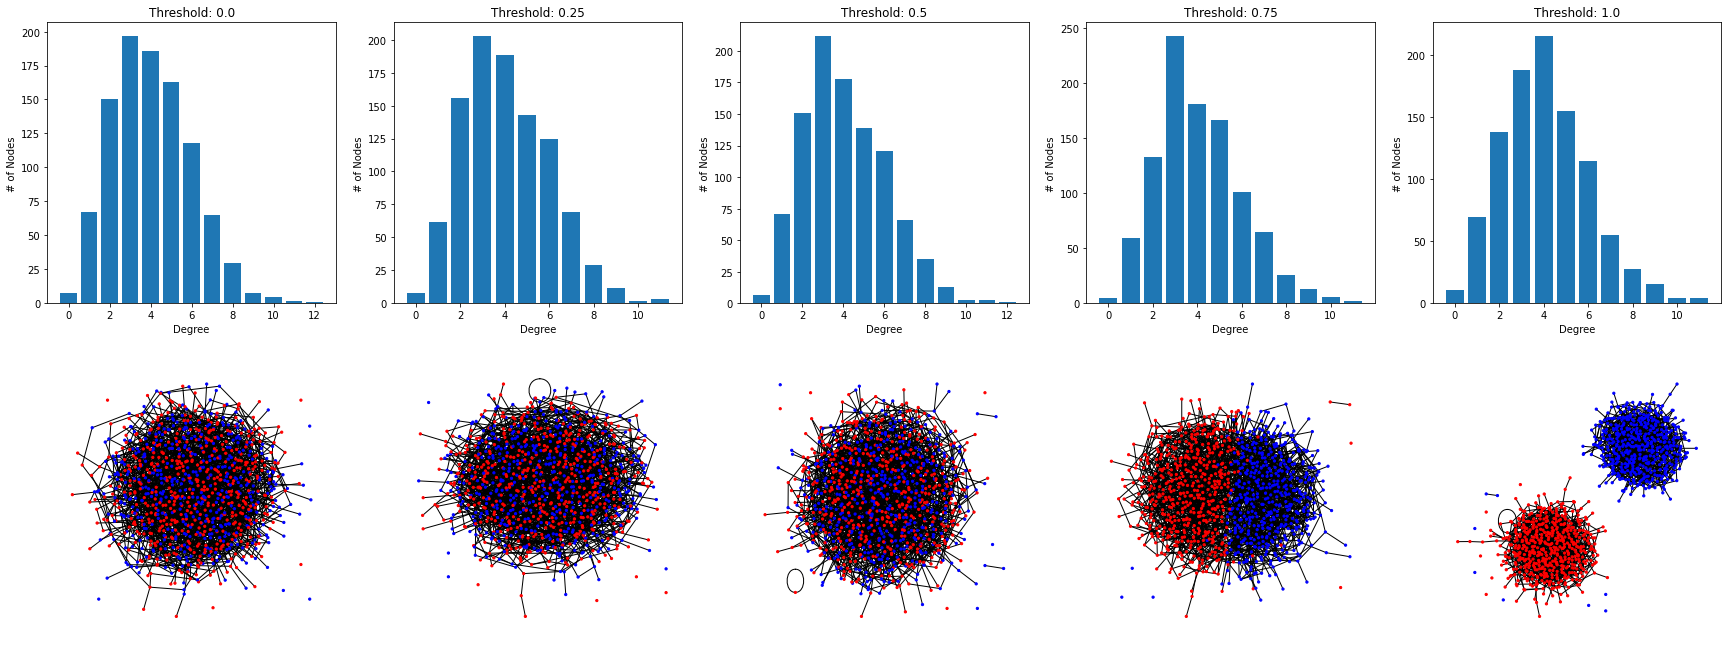

In [11]:
fig = plt.figure("Erdos Analisis", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 5)
#make plot bigger
fig.set_size_inches(30, 30)

for i in range(5):
    ax = fig.add_subplot(axgrid[0, i])
    ax.set_title(f"Threshold: {df_erdos['threshold'][i]}")
    ax.set_xlabel("Degree")
    ax.set_ylabel("# of Nodes")
    ax.bar(*np.unique(df_erdos['degree_distribution'][i], return_counts=True))

    ax2 = fig.add_subplot(axgrid[1, i])
    pos = graphviz_layout(l_erdos_colors[i][0])
    nx.draw(l_erdos_colors[i][0], pos, node_color=l_erdos_colors[i][1], node_size=5, with_labels=False, cmap=plt.cm.binary_r)
    plt.axis('off')

## Barabasi-Albert Analisis

In [12]:
df_barabasi

,threshold,degree_distribution,clustering,modularity,average_satisfaction
0,0.00,"[97, 77, 74, 58, 52, 50, 50, 49, 49, 48, 48, 4...",0.030728,0.000000,0.506459
1,0.25,"[95, 77, 72, 57, 52, 50, 50, 49, 48, 48, 48, 4...",0.030639,0.000000,0.530308
2,0.50,"[90, 72, 69, 56, 49, 48, 48, 47, 46, 45, 45, 4...",0.028080,0.000000,0.646768
3,0.75,"[79, 62, 58, 47, 44, 44, 40, 39, 39, 38, 37, 3...",0.023323,0.000000,0.878332
4,1.00,"[60, 51, 41, 38, 38, 37, 35, 32, 32, 30, 29, 2...",0.025939,0.497838,1.000000


/home/felipe/miniconda3/envs/redes/lib/python3.10/site-packages/networkx/drawing/nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


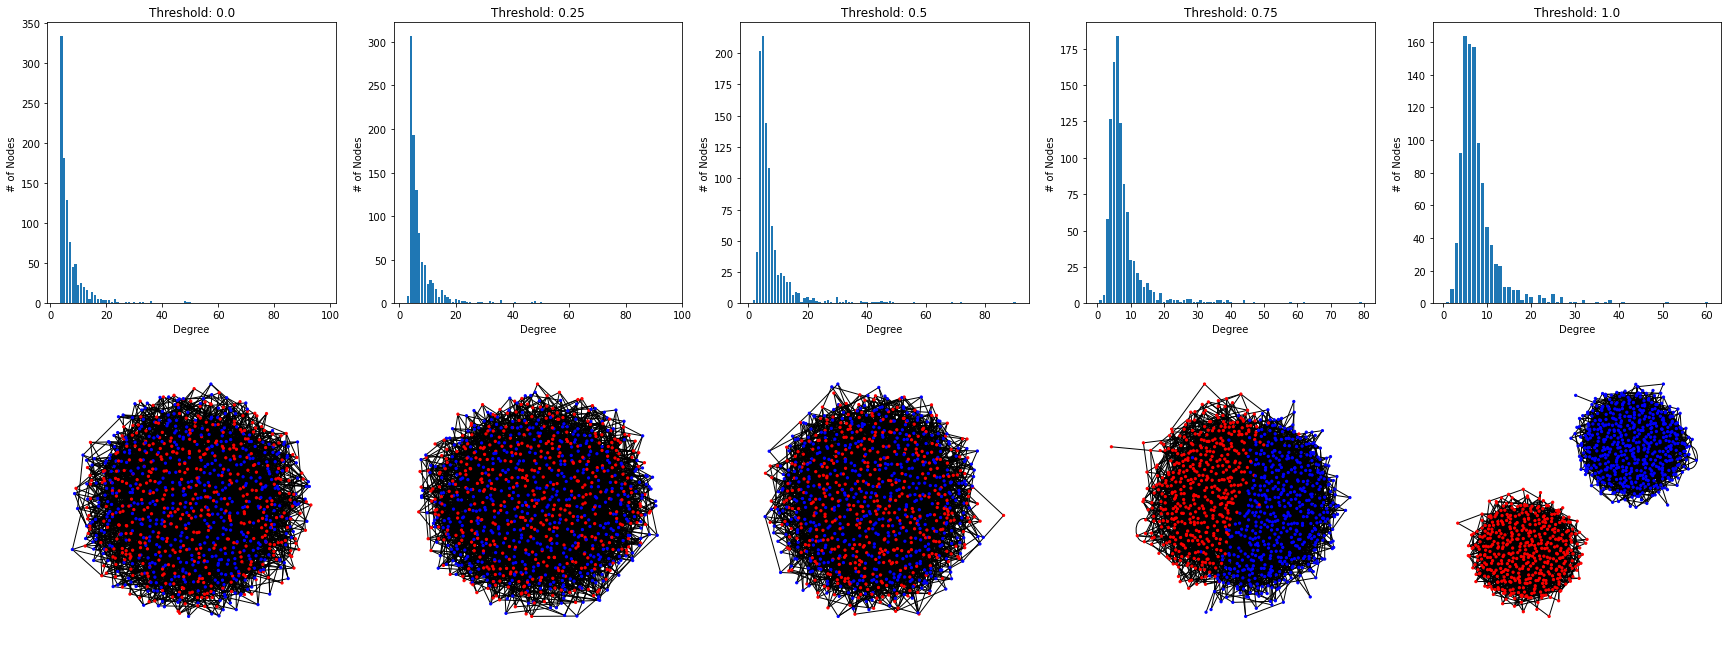

In [13]:
fig = plt.figure("Barabasi Analisis", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 5)
#make plot bigger
fig.set_size_inches(30, 30)

for i in range(5):
    ax = fig.add_subplot(axgrid[0, i])
    ax.set_title(f"Threshold: {df_barabasi['threshold'][i]}")
    ax.set_xlabel("Degree")
    ax.set_ylabel("# of Nodes")
    ax.bar(*np.unique(df_barabasi['degree_distribution'][i], return_counts=True))

    ax2 = fig.add_subplot(axgrid[1, i])
    pos = graphviz_layout(l_barabasi_colors[i][0])
    nx.draw(l_barabasi_colors[i][0], pos, node_color=l_barabasi_colors[i][1], node_size=5, with_labels=False, cmap=plt.cm.binary_r)
    plt.axis('off')


## Comentarios:


Para la red Erdos-Renyi, no existe mucha diferencia entre las metricas al ir aumentando el valor de __u__, la distribucion de grados se mantiene muy parecida, el nivel de clustering y la modularidad si bien aumenta es un cambio muy pequeño, podemos observar como al graficar la red a partir de un threshold de 0.75, la red ya es bastante separable, y como es de esperar para un threshold de 1.0, todos los nodos van a estar conectados solo con los nodos de su mismo color

En cambio para la red Barabasi-Albert, si se observan cambios mas notorios, si bien la distribucion de los grados se centra en valores de 0-20 para todos los threshold, se puede observar como al inicio la red presenta nodos con grado de hasta 100, y a medida que aumenta el threshold el grado maximo va disminuyendo hasta llegar a aproximandamente 60 con un threshold de 1.0, pero el nivel de clustering  en este caso va disminuyendo a medida que se aumenta el threshold, lo contrario que sucedio con la red Erdos-Renyi, la modularidad se mantiene en 0 para todos los threshold excepto para el 1.0 que aumenta drasticamente, y al graficar la red, se puede observar como a partir de un threshold de 0.75, la red ya es bastante separable, y como es de esperar para un threshold de 1, todos los nodos van a estar conectados solo con los nodos de su mismo color

---
# Pregunta 4: 

Baje el archivo "primaryschool.csv". Son datos del proyecto sociopatterns, en que se
registró la proximidad física de los alumnos y profesores de una escuela primaria en EEUU cada
20 segundos, durante dos días. Cada fila contiene (separados por tabs) la etiqueta temporal
(en segundos), los IDs de las personas (como 240 en total, con IDs entre el 1426 y el 1922), y
la clase a la que pertenecen (dato que ignoraremos). Escriba el código necesario para digerir
los datos y haga lo siguiente:


## ITEM __A__
Asuma que el tiempo completo se corta en ventanas de 10 minutos (sin traslape). Para
cada ventana genere la red agregada de las interacciones que allí ocurrieron, y a partir de
esta calcule el grado promedio, la transitividad (coeficiente de clustering) y la modularidad
(tras aplicar el algoritmo de comunidades que prefiera). Grafique la evolución de estos
tres valores a lo largo del tiempo. Comente.
Luego repita esto mismo pero para ventanas de 1 hora.

Utilizando la libreria __.csv__ de Python se realiza la lectura de los datos. 

Se implementa la función __agrupar_datos_en_ventanas(__ t_inicio, t_fin, duracion, lista_datos, ylim __)__ que recibe la lectura anterior en formato de lista, y realiza particiones de tiempo según los intervalos de duración pedidos(600 y 3600 segundos).

En cada partición almacena los IDs de las personas como nodos de un grafo, siendo los arcos las conexiones entre estas personas. 

Utilizando funciones propias de la libreria __NetworkX__ y __louvain__, se determina los valores de grado promedio, transitividad y modularidad para cada partición. El algoritmo utilizado para la determinación de la modularidad es el algoritmo de detección de __Louvain__

Se realizan los siguientes gráficos con la información obtenida anteriormente

Datos ventana 600 s


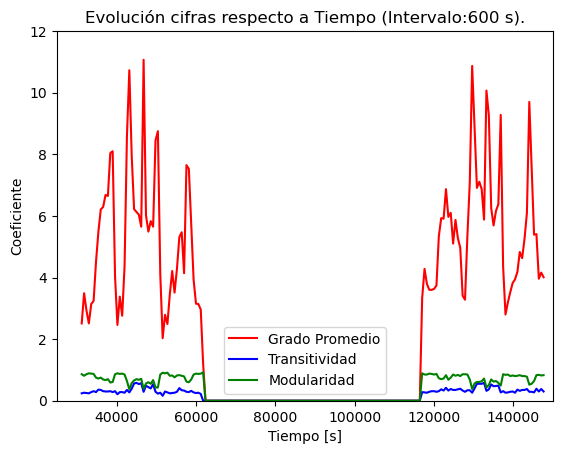

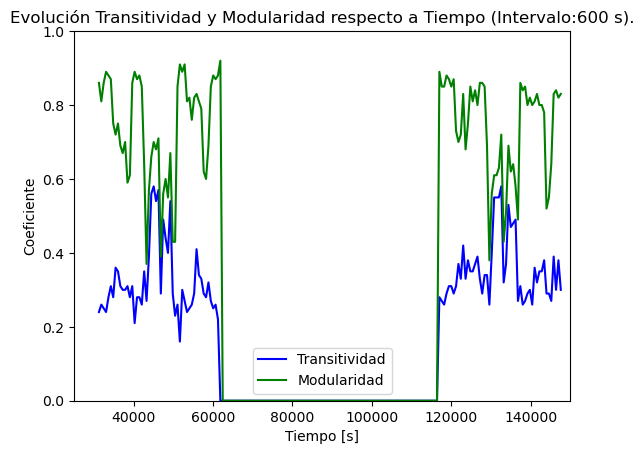

In [12]:
import csv
import community


directorio = "primaryschool.csv"  # Ruta del archivo CSV
lista_datos=[]
with open(directorio, "r") as archivo:
    lector_csv = csv.reader(archivo, delimiter="\t")  # Indicamos el delimitador como tabulación
    for fila in lector_csv:
        t=fila[0]
        id1=fila[1]
        id2=fila[2]
        lista_datos.append((t,id1,id2))
def agrupar_datos_en_ventanas(t_inicio, t_fin, duracion,lista_datos,ylim):
    #t inicio 31220
    #duracion 600 s 
    # primera ventana [31220 31820)
    #Segunda ventana [31820 32420]
    lista_t=[]
    lista_grado_promedio=[]
    lista_transitividad=[]
    lista_modularidad=[]
    
    for i in range(t_inicio,t_fin,duracion):
        lista_nodos_ventana=[]
        lista_arco_ventana=[]
        for elemento in lista_datos:
            t=elemento[0]
            id1=elemento[1]
            id2=elemento[2]
            if int(i)<=int(t) and int(t)<int(i)+int(duracion):
                if id1 not in lista_nodos_ventana:
                    lista_nodos_ventana.append(id1)
                if id2 not in lista_nodos_ventana:
                    lista_nodos_ventana.append(id2)
                variante1=(id1,id2)
                variante2=(id2,id1)
                if not ((id1,id2) or (id2,id1)) in lista_arco_ventana:
                    lista_arco_ventana.append((id1,id2))
        red=nx.Graph()
        red.add_nodes_from(lista_nodos_ventana)
        red.add_edges_from(lista_arco_ventana)

        #graficar grado promedio, transitividad, modularidad, y graficar evolucion de estos valores en el tiempo.
        #repetir para ventanas de 1 hora 
        
        try:
            grado_promedio_ventana=np.round(sum(dict(red.degree()).values()) / float(len(red)),2)
            transitividad_ventana=np.round(nx.average_clustering(red),2)
            particion=community.best_partition(red)
            modularidad=np.round(float(community.modularity(particion, red)),2)
        except:
            grado_promedio_ventana=0
            transitividad_ventana=0
            modularidad=0
        
        lista_t.append(i)
        lista_grado_promedio.append(grado_promedio_ventana)
        lista_transitividad.append(transitividad_ventana)
        lista_modularidad.append(modularidad)
        
        #print('t: '+str(i))
        #print(red)
        #print(grado_promedio_ventana)
        #print(transitividad_ventana)
        #print(modularidad)
    
    #graficar
    x=np.array(lista_t)
    y1=np.array(lista_grado_promedio)
    y2=np.array(lista_transitividad)
    y3=np.array(lista_modularidad)
    #grafico general
    plt.plot(x, y1,color='red', label='Grado Promedio')
    plt.plot(x, y2,color='blue', label='Transitividad')
    plt.plot(x, y3,color='green', label='Modularidad')
    
    plt.ylim(0,ylim)
    plt.xlim(25000,150000)    
    plt.title('Evolución cifras respecto a Tiempo (Intervalo:'+str(duracion)+' s).')
    plt.legend()
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Coeficiente')
    plt.show()
    #grafico alternativo.
    plt.plot(x, y2,color='blue', label='Transitividad')
    plt.plot(x, y3,color='green', label='Modularidad')
    
    plt.ylim(0,1)
    plt.xlim(25000,150000)    
    plt.title('Evolución Transitividad y Modularidad respecto a Tiempo (Intervalo:'+str(duracion)+' s).')
    plt.legend()
    plt.xlabel('Tiempo [s]')
    plt.ylabel('Coeficiente')
    plt.show()
    
print('Datos ventana 600 s')
agrupar_datos_en_ventanas(31220,148120,600,lista_datos,12)

Para el gráfico obtenido de la tabulación de los datos de Grado Promedio, Transitividad y Modularidad con ventanas de __10 minutos__ .
Se pueden notar 3 tramos de tiempo con distintos comportamientos de las propiedades:

- __Tramo 10.000-65.000 sec__ :
  - En general, el grado promedio presenta varias fluctuaciones con picos y caídas, desciende finalmente hasta 0 cuando alcanza casi el final del intervalo. Esto debido a que no hay datos desde t≈62.000 s.
  - En cuanto a la transitividad y Modularidad, se observa en general un comportamiento fluctuante. Casi al medio de este intervalo el valor parece converger a 0.5, a medida que nos acercamos a cualquiera de los extremos los valores 'divergen' de 0.5. 
  - Podemos notar que el comportamiento de las 3 curvas son extremadamente fluctuantes, veremos en el siguiente escenario ampliando la ventana de tiempo que las fluctuaciones disminuyen.

- __Tramo 65.000-117.000 sec__ :
  - Debido a que no hay datos de interacciones entre personas durante este rango de tiempo, el grado promedio, transitividad y modularidad es cero.

- __Tramo 117.000-146.000 sec__ :
  - Es muy similar al escenario del primer tramo, sólo que aquí comienza desde coeficiente = 0 (Contrario al primero tramo donde terminaban en cero las propiedades).
  

Datos ventana 3600 s


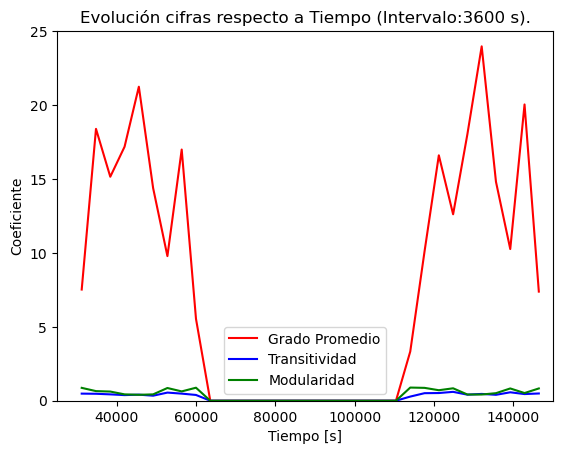

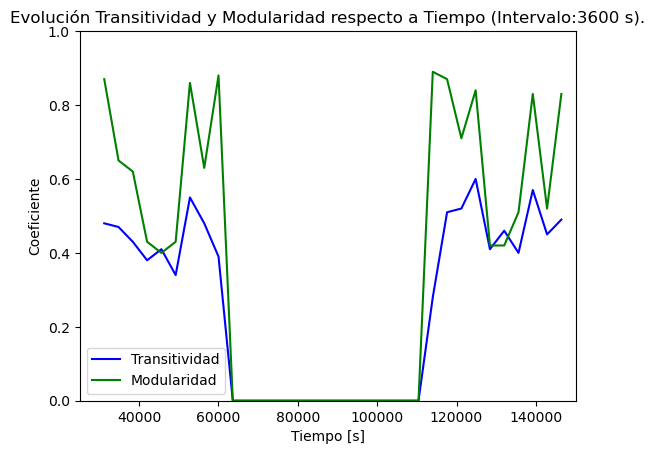

In [13]:
print('Datos ventana 3600 s')
agrupar_datos_en_ventanas(31220,148120,3600,lista_datos,25)

Para el gráfico obtenido de la tabulación de los datos de Grado Promedio, Transitividad y Modularidad con ventanas de __10 minutos__ .
Se pueden notar 3 tramos de tiempo con distintos comportamientos de las propiedades:

- __Tramo 10.000-65.000 sec__ :
  - El grado promedio presenta varias fluctuaciones con picos y caídas a medida que asciende hasta casi la mitad del intervalo, estas fluctuaciones son mucho más pequeñas que el gráfico anterior con una ventana de tiempo más pequeña. Luego de la mitad del intervalo el grado promedio comienza a disminuir en forma lineal, encontrandose con una fluctuación mediana hasta luego descender completamente a 0 ya en el final del tramo. Esto debido a que no hay datos desde t≈62.000 s.
  
  - En cuanto a la transitividad y Modularidad, se observa en general un comportamiento mucho menos fluctuante que el obtenido con la ventana de 600 segundos. Casi al medio de este intervalo el valor parece converger a 0.5, a medida que nos acercamos a cualquiera de los extremos los valores 'divergen' de 0.5 con un comportamiento en 'linea recta', sin tantas fluctuaciones como el escenario anterior con la ventana de 600 segundos. 

- __Tramo 65.000-117.000 sec__ :
  - Debido a que no hay datos de interacciones entre personas durante este rango de tiempo, el grado promedio, transitividad y modularidad es cero.

- __Tramo 117.000-146.000 sec__ :
  - Es muy similar al escenario del primer tramo, sólo que aquí comienza desde coeficiente = 0 al empezar el rango.

## ITEM __B__
Considerando como origen al alumno con ID 1695, del primero B, considere su conjunto
de influencia I(T, d) consistente en todos los nodos que se pueden alcanzar a partir de él,
respetando el orden temporal de las conexiones, entre los tiempos T y T + d. Grafique el
tamaño de I(T, d) en función de ambos parámetros (es decir, en función de ambos ejes a
la vez, no por separado). Use la granularidad que le parezca razonable para obtener una
buena visualización. Comente.


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import math
import plotly.express as px

In [15]:
df = pd.read_csv('primaryschool.csv',sep='\t', header=None, names=['t','id1','id2', 'c1', 'c2']) #leemos el archivo csv

In [16]:
df

,t,id1,id2,c1,c2
0,31220,1558,1567,3B,3B
1,31220,1560,1570,3B,3B
2,31220,1567,1574,3B,3B
3,31220,1632,1818,4B,4B
4,31220,1632,1866,4B,4B
...,...,...,...,...,...
125768,148120,1752,1783,1A,1A
125769,148120,1752,1789,1A,1A
125770,148120,1775,1798,1A,1A
125771,148120,1783,1796,1A,1A


In [17]:
df_copy = df.copy() #copiamos el dataframe para no modificar el original
df_copy['t'] = df_copy['t'] - df_copy['t'].min() #restamos el tiempo minimo a todos los tiempos para que empiecen en 0

In [18]:
df_copy

,t,id1,id2,c1,c2
0,0,1558,1567,3B,3B
1,0,1560,1570,3B,3B
2,0,1567,1574,3B,3B
3,0,1632,1818,4B,4B
4,0,1632,1866,4B,4B
...,...,...,...,...,...
125768,116900,1752,1783,1A,1A
125769,116900,1752,1789,1A,1A
125770,116900,1775,1798,1A,1A
125771,116900,1783,1796,1A,1A


In [19]:
id_alumno = 1695

In [20]:
def generate_list(t_max, delta_t): #genera una lista de tiempos desde 0 hasta t_max con intervalos de delta_t
    lista = []
    t = 0
    while t <= t_max:
        lista.append(t)
        t += delta_t
    return lista

def filter_data(df, t_0, d): #filtra los datos entre t_0 y t_0 + d
    df_filtered = df[(df['t'] >= t_0) & (df['t'] <= t_0 + d)]
    return df_filtered

def valid_edges(df, id_alumno, olds_ids): #funcion que itera respetando el tiempo y devuelve los ids validos
    id_set = set(olds_ids + [id_alumno]) #creamos un set con los ids validos
    for _, row in df.iterrows(): #iteramos sobre cada fila del dataframe
        if row['id1'] in id_set: #si el id1 de la fila esta en el set, agregamos el id2 al set
            id_set.add(row['id2'])
        if row['id2'] in id_set: #si el id2 de la fila esta en el set, agregamos el id1 al set
            id_set.add(row['id1'])
    new_ids = list(id_set) #Actualizamos la lista de ids validos
    return new_ids

def iterations(delta_d, df): #funcion que itera sobre cada tiempo y guarda los datos junto con I(T,d)
    l_final = []
    t_max = df['t'].max()
    t_list = generate_list(t_max, delta_d) #generamos la lista de tiempos
    print()
    for t in tqdm (range(0, len(t_list)-1), desc="Calculando Influencias de la Red..."): #iteramos sobre cada tiempo
        ids = []
        d_max = math.floor((t_max - t_list[t])/delta_d) #calculamos el d_max
        for d in range(1, d_max + 1): #iteramos sobre cada d
            df_filtered = filter_data(df, t_list[t], d * delta_d) #filtramos los datos
            ids = valid_edges(df_filtered, id_alumno, ids) #obtenemos los ids validos
            l_final.append((t_list[t], d*delta_d, len(ids))) #agregamos los datos a la lista final
    return l_final

In [21]:
prueba = iterations(60*60, df_copy) #analizaremos la red cada 1h

Calculando Influencias de la Red...: 100%|██████████| 32/32 [09:06<00:00, 17.09s/it]


In [22]:
df_sim = pd.DataFrame(prueba, columns=['T', 'd', 'I(T,d)']) #creamos un dataframe con los resultados
df_sim['h'] = df_sim['d'] // 3600 #agregamos la columna de horas

In [23]:
df_sim

,T,d,"I(T,d)",h
0,0,3600,26,1
1,0,7200,207,2
2,0,10800,233,3
3,0,14400,233,4
4,0,18000,234,5
...,...,...,...,...
523,104400,7200,213,2
524,104400,10800,213,3
525,108000,3600,77,1
526,108000,7200,165,2


### Grafico del Tamaño de I(T,d) en función de T y d

Ambos Graficos son interactivos por lo que se pueden mover con el cursor los distintos ejes y ver los valores de I(T,d) en cada punto.

In [24]:
fig = px.scatter_3d(df_sim, x='T', y='d', z='I(T,d)', height=600, title='Tamaño de I(T,d) en función de T y d', color="I(T,d)")
fig.show()

### Grafico Animado de la evolución del tamaño de I(T,d) en función de T y d (en Horas)

In [25]:
fig = px.scatter(df_sim, x='T', y='I(T,d)', height=600, title='Tamaño de I(T,d) en función de T y d', animation_frame="h")
fig.show()

### Comentarios

Utilizamos una granularidad de 1h, ya que si utilizabamos los 20 segundos de diferencia en que venian los datos, el calculo demoraba demasiadas horas.

Se puede observar como a medidad que aumenta el d, mayor es la cantidad de nodos que se pueden alcanzar, esto es algo mas o menos obvio, pero es interesante notar el efecto de T, ya que uno pensaria que a mayor T, mayor es I(T,d) porque hay mas nodos disponibles y si bien a mayor T va aumentando llega un punto de T entre [30.000, 80.000] donde I(T,d) es bajo, esto nos quiere decir que en este rango de T el alumno con id 1695 no tuvo interacciones con otros nodos, al compararlo con los graficos de la seccion A, podemos ver que en este rango de T es donde la red no tiene interacciones, por lo que es un resultado esperable y nos indica que en este periodo la escuela podria haber estado cerrada o no haber tenido clases.

Recien con un d=72.000, lo que equivale a 20 horas, todos los nodos alcanzan el mayor valor de I(T,d), esto nos quiere decir que en 20 horas todos los nodos de la red tuvieron interacciones con el alumno 1695, lo que nos indica que en este periodo la escuela estuvo abierta y que no llegaron nuevos alumnos o nuevos profesores despues de pasadas 20 horas.